In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('Mental Health Dataset.csv')

In [2]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
# checking number of missing values
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [5]:
# dropping the missing rows on "self employed" column
df = df.dropna(subset=['self_employed'])
# checking the number of missing values after dropping
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [6]:
# Frequency counts and unique values
summary = df.describe(include='object')
print(summary)

              Timestamp  Gender        Country Occupation self_employed  \
count            287162  287162         287162     287162        287162   
unique              574       2             35          5             2   
top     8/27/2014 11:43    Male  United States  Housewife            No   
freq               2384  235950         168056      65173        257994   

       family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
count          287162    287162       287162         287162         287162   
unique              2         2            5              3              3   
top                No       Yes    1-14 days          Maybe            Yes   
freq           173668    144744        62429          98225         107579   

       Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
count                 287162      287162           287162        287162   
unique                     3           3                2             3   
top     

In [7]:
# Specific frequency distributions for Days_Indoors, Growing_Stress, and Coping_Struggles
days_indoors_dist = df['Days_Indoors'].value_counts()
growing_stress_dist = df['Growing_Stress'].value_counts()
coping_struggles_dist = df['Coping_Struggles'].value_counts()

days_indoors_dist, growing_stress_dist, coping_struggles_dist

(Days_Indoors
 1-14 days             62429
 31-60 days            59625
 Go out Every day      57323
 More than 2 months    54918
 15-30 days            52867
 Name: count, dtype: int64,
 Growing_Stress
 Maybe    98225
 Yes      97854
 No       91083
 Name: count, dtype: int64,
 Coping_Struggles
 No     151609
 Yes    135553
 Name: count, dtype: int64)

In [8]:
# Apply the specified encoding to the relevant columns

# Copy the original DataFrame
df_encoded = df.copy()

# list of ternary columns
ternary_columns = ['Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 
                   'Work_Interest', 'Social_Weakness', 'mental_health_interview']

# Encoding for ternary columns: "Yes" = 1, "Maybe" = 0.5, "No" = 0
df_encoded[ternary_columns] = df_encoded[ternary_columns].applymap(lambda x: 1 if x == 'Yes' else (0.5 if x == 'Maybe' else (0 if x == 'No' else None)))

# Encoding for care_options separately "Yes" = 1, "Not sure" = 0.5, "No" = 0
df_encoded['care_options'] = df_encoded['care_options'].map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else (0.5 if x == 'Not sure' else None)))

# Binary columns
binary_columns = ['family_history', 'treatment', 'Coping_Struggles']

# Encoding for binary columns: "Yes" = 1, "No" = 0
df_encoded[binary_columns] = df_encoded[binary_columns].applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

# Recompute the correlation matrix with updated encodings
correlation_matrix_final = df_encoded[ternary_columns + binary_columns + ['care_options']].corr()

correlation_matrix_final


,Growing_Stress,Changes_Habits,Mental_Health_History,Work_Interest,Social_Weakness,mental_health_interview,family_history,treatment,Coping_Struggles,care_options
Growing_Stress,1.000000,-0.015671,0.030715,0.042259,0.033674,-0.004835,0.008275,0.007148,-0.018749,0.004481
Changes_Habits,-0.015671,1.000000,-0.022910,0.029952,-0.003001,0.001426,-0.002440,-0.002107,-0.028302,-0.001321
Mental_Health_History,0.030715,-0.022910,1.000000,0.050507,-0.062492,-0.000965,0.001652,0.001427,-0.017019,0.000895
Work_Interest,0.042259,0.029952,0.050507,1.000000,-0.055860,-0.002062,0.003530,0.003049,0.034346,0.001912
Social_Weakness,0.033674,-0.003001,-0.062492,-0.055860,1.000000,0.000531,-0.000909,-0.000785,0.008554,-0.000492
mental_health_interview,-0.004835,0.001426,-0.000965,-0.002062,0.000531,1.000000,-0.057242,-0.057218,-0.006461,0.044211
family_history,0.008275,-0.002440,0.001652,0.003530,-0.000909,-0.057242,1.000000,0.371474,0.011056,0.119625
treatment,0.007148,-0.002107,0.001427,0.003049,-0.000785,-0.057218,0.371474,1.000000,0.009550,0.252841
Coping_Struggles,-0.018749,-0.028302,-0.017019,0.034346,0.008554,-0.006461,0.011056,0.009550,1.000000,0.005988
care_options,0.004481,-0.001321,0.000895,0.001912,-0.000492,0.044211,0.119625,0.252841,0.005988,1.000000


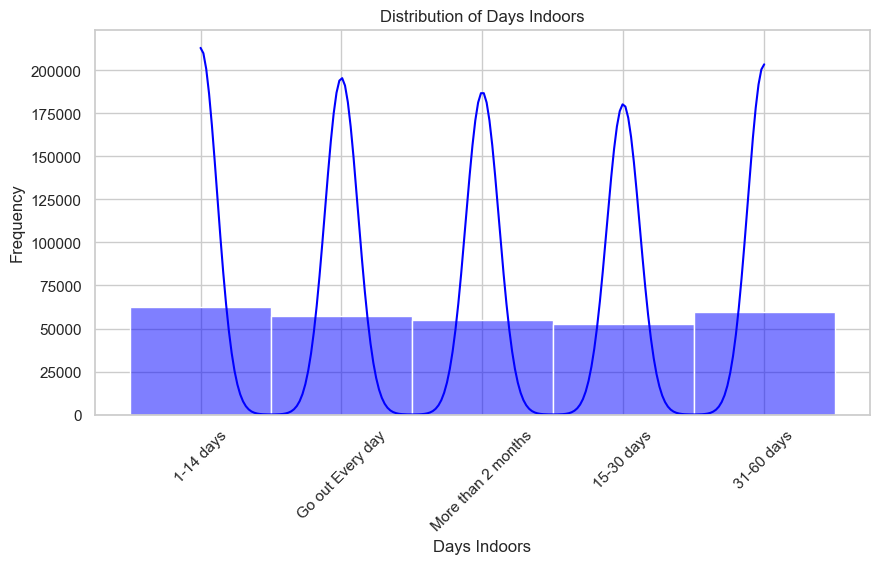

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the histograms
plt.figure(figsize=(10, 5))

# Histogram for Days_Indoors
sns.histplot(df_encoded['Days_Indoors'], kde=True, bins=30, color='blue')
plt.title('Distribution of Days Indoors')
plt.xlabel('Days Indoors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

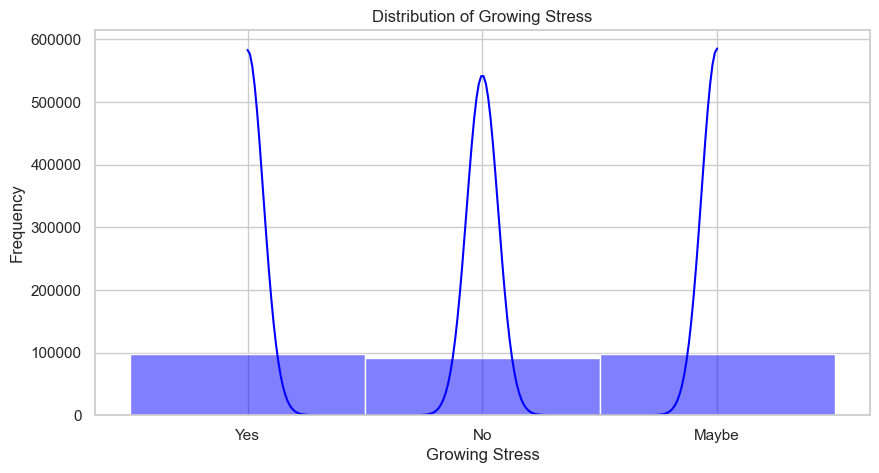

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the histograms
plt.figure(figsize=(10, 5))

# Histogram for Growing_Stress
sns.histplot(df['Growing_Stress'], kde=True, bins=30, color='blue')
plt.title('Distribution of Growing Stress')
plt.xlabel('Growing Stress')
plt.ylabel('Frequency')
plt.show()

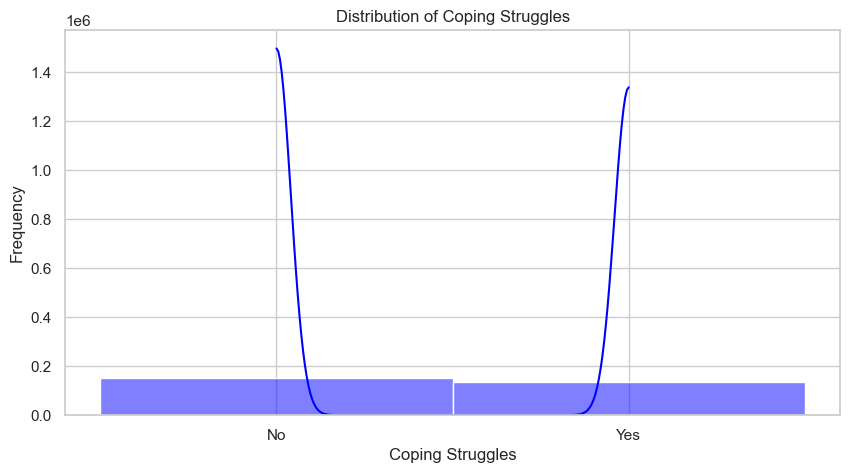

In [11]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the histograms
plt.figure(figsize=(10, 5))

# Histogram for Coping_Struggles
sns.histplot(df['Coping_Struggles'], kde=True, bins=30, color='blue')
plt.title('Distribution of Coping Struggles')
plt.xlabel('Coping Struggles')
plt.ylabel('Frequency')
plt.show()


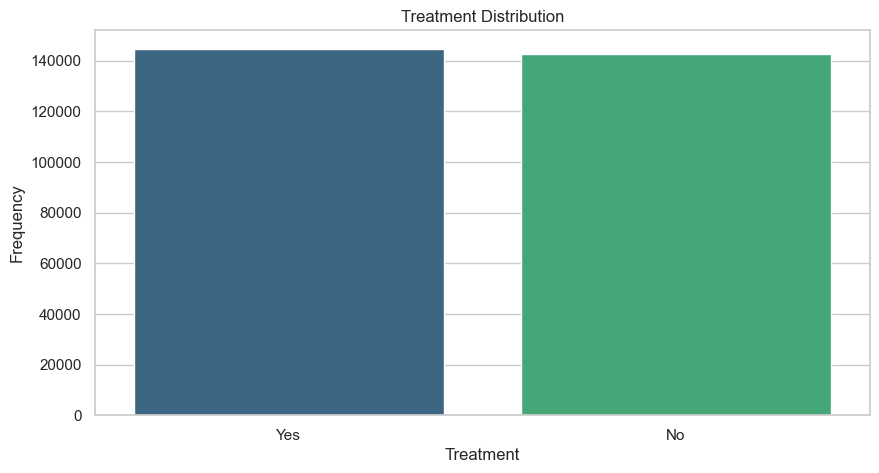

In [12]:
# Creating bar charts for 'treatment'

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='treatment', data=df, palette='viridis')
plt.title('Treatment Distribution')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.show()


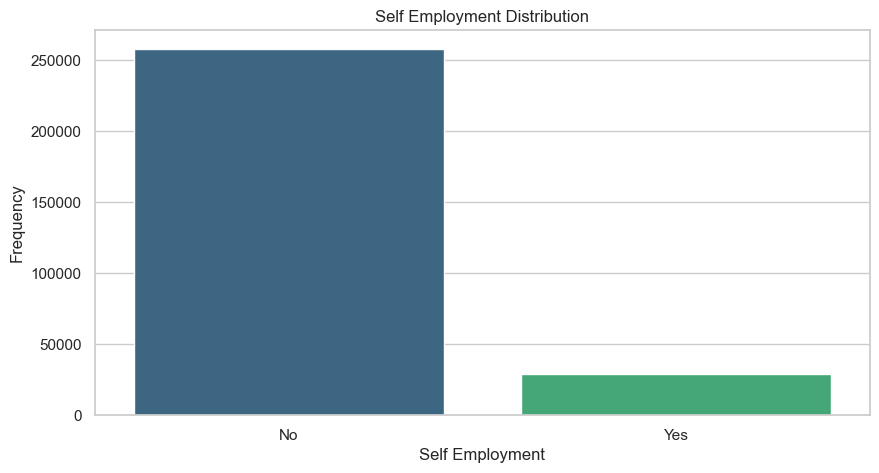

In [13]:
# Creating Bar chart for 'self_employed'

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='self_employed', data=df, palette='viridis')
plt.title('Self Employment Distribution')
plt.xlabel('Self Employment')
plt.ylabel('Frequency')
plt.show()


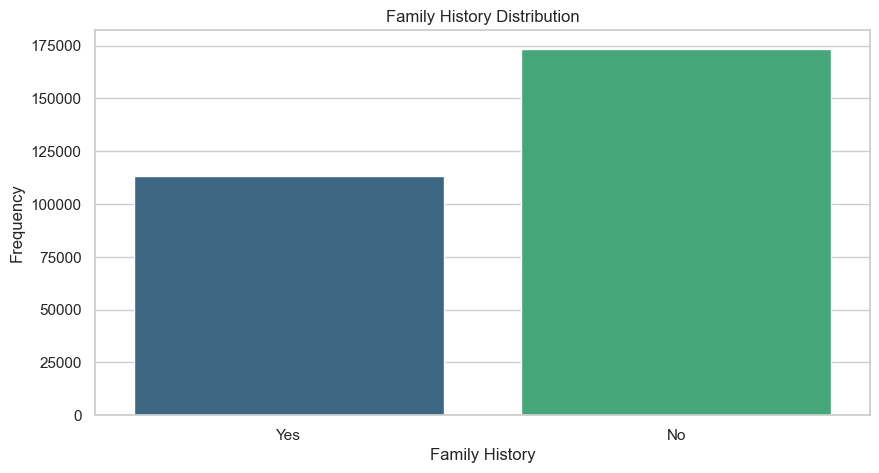

In [14]:
# creating bar chart for 'family_history'

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='family_history', data=df, palette='viridis')
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Frequency')
plt.show()

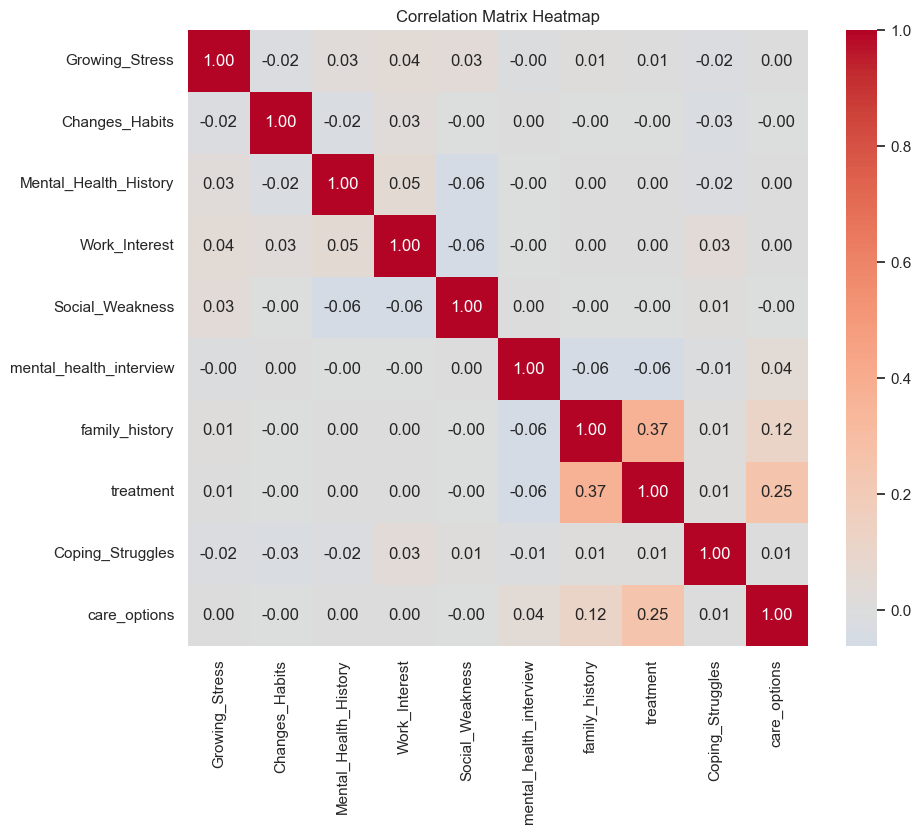

In [15]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [20]:
# feature selection
x = df[['family_history', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'care_options']]

In [22]:
x.head()

,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,care_options
3,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Yes
4,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Yes
5,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Not sure
6,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Not sure
7,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [23]:
# encoding all the categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['family_history', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'care_options']
for feature in features:
    x[feature] = le.fit_transform(x[feature])
x.head()

,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,care_options
3,1,0,2,1,2,2,0,1,2,2
4,1,0,2,1,2,2,0,1,2,2
5,0,0,2,1,2,2,0,1,2,1
6,1,0,2,1,2,2,0,1,2,1
7,0,0,2,1,2,2,0,1,2,0


In [24]:
# convert x into an array
x = np.array(x)


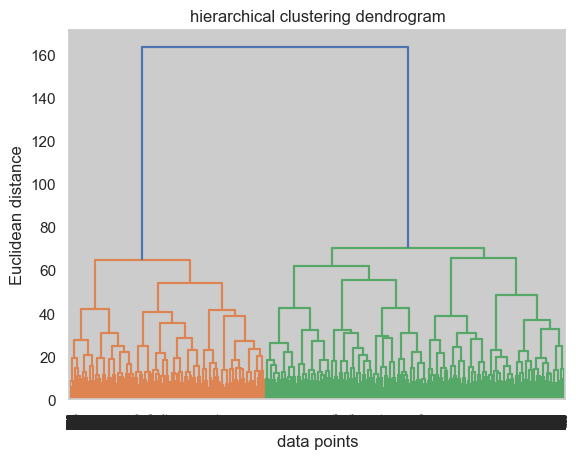

In [30]:
# creating a dendrogram to merge similar clusters
from scipy.cluster.hierarchy import linkage, dendrogram

indices = np.random.choice(x.shape[0], size=10000, replace=False)
sample_data = x[indices]
matrix = linkage(sample_data, method='ward')
dendrogram(matrix)
info = dendrogram(matrix)
plt.title('hierarchical clustering dendrogram')
plt.xlabel('data points')
plt.ylabel('Euclidean distance')
plt.show()